In [ ]:
 # mount google drive and change the current working directory
from google.colab import drive # import the drive module
drive.mount('/content/drive') # mount google drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#cd defines my folder "Colab Notebooks" in my Stony Brook Google drive, which saves my notebooks and data, as the working directory
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
# check if this python notebook is in the folder "Colab Notebooks"
!ls

Data  DataSummary.ipynb  Notbooks


In [ ]:
#import tensorflow as tf # a library for deep learning.  https://www.tensorflow.org/
#import tensorflow_probability as tfp # a library for probabilistic reasoning and statistical analysis
#tfd = tfp.distributions # tfp.distributions is a module of statistical distributions.
#tfs = tfp.stats # tfp.stats is a module of statistical functions


import numpy as np # a foundamental package for scientific computing https://numpy.org/

import pandas as pd # a library of data analysis, https://pandas.pydata.org/

import matplotlib.pyplot as plt  # a module for plotting, https://matplotlib.org/

import seaborn as sns # a module for data visualization, https://seaborn.pydata.org/index.html

#import statsmodels as sm
#from statsmodels import stats # we'll use stats module of statsmodels



# Get to Know the Dataset

## Dataframe

In [ ]:
# read the data file

NY_bicycle=pd.read_csv("Data/NY_Bicycle.csv") # read the data file in csv format using pd.read_csv()
print(NY_bicycle.head(),'\n') # head() will show the first five rows of the dataframe
del NY_bicycle["Unnamed: 0"] # delete the column "Unnamed: 0" because it duplicates the index of dataframe
print(NY_bicycle.head()) # take a look at the data again after deleting the unnamed column

   Unnamed: 0   Date        Day  High_Temp_F  Low_Temp_F  Precipitation  \
0           1  1-Apr   Saturday         46.0        37.0           0.00   
1           2  2-Apr     Sunday         62.1        41.0           0.00   
2           3  3-Apr     Monday         63.0        50.0           0.03   
3           4  4-Apr    Tuesday         51.1        46.0           1.18   
4           5  5-Apr  Wednesday         63.0        46.0           0.00   

  Weather  Brooklyn_Bridge  Manhattan_Bridge  Williamsburg_Bridge  \
0       N              606              1446                 1915   
1       N             2021              3943                 4207   
2       R             2470              4988                 5178   
3       R              723              1913                 2279   
4       N             2807              5276                 5711   

   Queensboro_Bridge  Total  
0               1430   5397  
1               2862  13033  
2               3689  16325  
3             

In [ ]:
NY_bicycle.info() #info() summarizes columns and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 214 non-null    object 
 1   Day                  214 non-null    object 
 2   High_Temp_F          214 non-null    float64
 3   Low_Temp_F           214 non-null    float64
 4   Precipitation        200 non-null    float64
 5   Weather              214 non-null    object 
 6   Brooklyn_Bridge      214 non-null    int64  
 7   Manhattan_Bridge     214 non-null    int64  
 8   Williamsburg_Bridge  214 non-null    int64  
 9   Queensboro_Bridge    214 non-null    int64  
 10  Total                214 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 18.5+ KB


In [ ]:
NY_bicycle.columns # dataframe.columns shows column lables

Index(['Date', 'Day', 'High_Temp_F', 'Low_Temp_F', 'Precipitation', 'Weather',
       'Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge',
       'Queensboro_Bridge', 'Total'],
      dtype='object')

In [ ]:
NY_bicycle.columns[4] #to check the column label by colum index. Keep in mind that the first column index value is zero, not one

'Precipitation'

In [ ]:
NY_bicycle.dtypes['Weather'] #if you would like to check the datatype of a column or all, using dataframe.dtypes

dtype('O')

In [ ]:
NY_bicycle.index # to find how the data are indexed, using dataframe.index

RangeIndex(start=0, stop=214, step=1)

In [ ]:
NY_bicycle.values[2] # to check an observation of the dataframe, using dataframe.values[index of the observation]

array(['3-Apr', 'Monday', 63.0, 50.0, 0.03, 'R', 2470, 4988, 5178, 3689,
       16325], dtype=object)

In [ ]:
NY_bicycle.values[2][4] # to check the value of a column in an observation, using dataframe.values[index of the observation][index of column]

0.03

In [ ]:
NY_bicycle.Weather # display the data of a column using dataframe.column label

0      N
1      N
2      R
3      R
4      N
      ..
209    N
210    N
211    R
212    R
213    N
Name: Weather, Length: 214, dtype: object

In [ ]:
NY_bicycle.iloc[:,5] # using dataframe.iloc[:,column index] to display a column of data by indices

0      N
1      N
2      R
3      R
4      N
      ..
209    N
210    N
211    R
212    R
213    N
Name: Weather, Length: 214, dtype: object

In [ ]:
NY_bicycle.iloc[4,:] # dataframe.iloc[observation index,:] to display an observation by the observation index

Date                       5-Apr
Day                    Wednesday
High_Temp_F                 63.0
Low_Temp_F                  46.0
Precipitation                0.0
Weather                        N
Brooklyn_Bridge             2807
Manhattan_Bridge            5276
Williamsburg_Bridge         5711
Queensboro_Bridge           4197
Total                      17991
Name: 4, dtype: object

In [ ]:
NY_bicycle.iloc[2,4] # dataframe.iloc[observation index,column index] retrieves the value at the coordinates

0.03

# Data Modification

## Sorting

In [ ]:
NY_bicycle.sort_values(by='Total', na_position='first',ascending=False) # dataframe.sort_values() sorts dataframe by values of a column

,Date,Day,High_Temp_F,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
116,26-Jul,Wednesday,75.9,66.0,0.00,N,3821,7987,8605,6556,26969
130,9-Aug,Wednesday,82.9,66.0,0.00,N,3893,7791,8589,6582,26855
88,28-Jun,Wednesday,78.1,62.1,0.00,N,3766,8239,8873,5834,26712
164,12-Sep,Tuesday,78.1,61.0,0.00,N,3497,7983,8756,6386,26622
75,15-Jun,Thursday,75.0,66.0,0.00,N,3510,7854,8652,6344,26360
...,...,...,...,...,...,...,...,...,...,...,...
34,5-May,Friday,59.0,52.0,3.02,R,513,1471,1951,1421,5356
5,6-Apr,Thursday,48.9,41.0,0.73,R,461,1324,1739,1372,4896
54,25-May,Thursday,57.9,55.9,0.58,R,488,1196,1789,1316,4789
211,29-Oct,Sunday,64.9,61.0,3.03,R,183,661,1026,965,2835


In [ ]:
NY_bicycle.sort_values(by='Weather', ascending=True) # ascending=False returns the sorting result in the reverse alphabetical order

,Date,Day,High_Temp_F,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
0,1-Apr,Saturday,46.0,37.0,0.0,N,606,1446,1915,1430,5397
124,3-Aug,Thursday,86.0,70.0,0.0,N,3346,6728,7297,5835,23206
127,6-Aug,Sunday,75.9,64.0,0.0,N,3130,5088,5634,4207,18059
129,8-Aug,Tuesday,77.0,66.0,0.0,N,3598,7176,7571,5932,24277
130,9-Aug,Wednesday,82.9,66.0,0.0,N,3893,7791,8589,6582,26855
...,...,...,...,...,...,...,...,...,...,...,...
144,23-Aug,Wednesday,80.1,71.1,NaN,T,2994,6586,7297,6122,22999
15,16-Apr,Sunday,84.9,62.1,NaN,T,2877,4585,5259,3687,16408
16,17-Apr,Monday,73.9,64.0,NaN,T,3152,6352,6924,4658,21086
90,30-Jun,Friday,88.0,73.9,NaN,T,2687,5890,7013,4754,20344


In [ ]:
NY_bicycle_sort_pre = NY_bicycle.sort_values(by='Total', na_position='first',ascending=False) # sort by total
print(NY_bicycle_sort_pre)

NY_bicycle_sort_pre.sort_index() #dataframe.sort_index() sorts the dataframe by the index

       Date        Day  High_Temp_F  Low_Temp_F  Precipitation Weather  \
116  26-Jul  Wednesday         75.9        66.0           0.00       N   
130   9-Aug  Wednesday         82.9        66.0           0.00       N   
88   28-Jun  Wednesday         78.1        62.1           0.00       N   
164  12-Sep    Tuesday         78.1        61.0           0.00       N   
75   15-Jun   Thursday         75.0        66.0           0.00       N   
..      ...        ...          ...         ...            ...     ...   
34    5-May     Friday         59.0        52.0           3.02       R   
5     6-Apr   Thursday         48.9        41.0           0.73       R   
54   25-May   Thursday         57.9        55.9           0.58       R   
211  29-Oct     Sunday         64.9        61.0           3.03       R   
42   13-May   Saturday         51.1        45.0           1.31       R   

     Brooklyn_Bridge  Manhattan_Bridge  Williamsburg_Bridge  \
116             3821              7987          

,Date,Day,High_Temp_F,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
0,1-Apr,Saturday,46.0,37.0,0.00,N,606,1446,1915,1430,5397
1,2-Apr,Sunday,62.1,41.0,0.00,N,2021,3943,4207,2862,13033
2,3-Apr,Monday,63.0,50.0,0.03,R,2470,4988,5178,3689,16325
3,4-Apr,Tuesday,51.1,46.0,1.18,R,723,1913,2279,1666,6581
4,5-Apr,Wednesday,63.0,46.0,0.00,N,2807,5276,5711,4197,17991
...,...,...,...,...,...,...,...,...,...,...,...
209,27-Oct,Friday,62.1,48.0,0.00,N,3150,5610,6450,5181,20391
210,28-Oct,Saturday,68.0,55.9,0.00,N,2245,4520,5104,4069,15938
211,29-Oct,Sunday,64.9,61.0,3.03,R,183,661,1026,965,2835
212,30-Oct,Monday,55.0,46.0,0.25,R,1428,2966,3547,2924,10865


In [ ]:
NY_bicycle.info()
NY_bicycle_sort = NY_bicycle.sort_values(by=['High_Temp_F', 'Low_Temp_F', 'Total'],ascending=False) # sort the dataframe by multiple columns
#NY_bicycle_sort # display the sorted dataframe
print(NY_bicycle_sort.iloc[:,[2,3,10]]) # display columns of the sorted dataframe, whose indices are 2, 3, and 10

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 214 non-null    object 
 1   Day                  214 non-null    object 
 2   High_Temp_F          214 non-null    float64
 3   Low_Temp_F           214 non-null    float64
 4   Precipitation        200 non-null    float64
 5   Weather              214 non-null    object 
 6   Brooklyn_Bridge      214 non-null    int64  
 7   Manhattan_Bridge     214 non-null    int64  
 8   Williamsburg_Bridge  214 non-null    int64  
 9   Queensboro_Bridge    214 non-null    int64  
 10  Total                214 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 18.5+ KB
     High_Temp_F  Low_Temp_F  Total
73          93.9        78.1  21577
110         93.0        78.1  20405
72          91.9        77.0  21200
47          91.9        75.0  23474
11

## Filtering

In [ ]:
NY_bicycle.iloc[3:6,6:10] # use dataframe.iloc to get a segment by its indices. This example extracts values of the columns indexed 6-9 in observations indexed 3-5

,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge
3,723,1913,2279,1666
4,2807,5276,5711,4197
5,461,1324,1739,1372


In [ ]:
NY_bicycle_sort = NY_bicycle.sort_values(by='Total', na_position='first',ascending=False) #sort the dataframe by "Total" in the descending order

NY_bicycle_sort[NY_bicycle_sort.Total>26000] #extracts observations with the crition: 'Total' value >26,000

,Date,Day,High_Temp_F,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
116,26-Jul,Wednesday,75.9,66.0,0.0,N,3821,7987,8605,6556,26969
130,9-Aug,Wednesday,82.9,66.0,0.0,N,3893,7791,8589,6582,26855
88,28-Jun,Wednesday,78.1,62.1,0.0,N,3766,8239,8873,5834,26712
164,12-Sep,Tuesday,78.1,61.0,0.0,N,3497,7983,8756,6386,26622
75,15-Jun,Thursday,75.0,66.0,0.0,N,3510,7854,8652,6344,26360
45,16-May,Tuesday,78.1,57.9,0.0,N,3666,7847,8420,6209,26142
46,17-May,Wednesday,90.0,66.0,0.0,N,3535,7888,8540,6121,26084
192,10-Oct,Tuesday,80.1,66.0,0.0,N,3922,7499,8208,6421,26050


In [ ]:
NY_bicycle[NY_bicycle.Total>26000] #extracts observations with the crition: 'Total' value >26,000


,Date,Day,High_Temp_F,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
45,16-May,Tuesday,78.1,57.9,0.0,N,3666,7847,8420,6209,26142
46,17-May,Wednesday,90.0,66.0,0.0,N,3535,7888,8540,6121,26084
75,15-Jun,Thursday,75.0,66.0,0.0,N,3510,7854,8652,6344,26360
88,28-Jun,Wednesday,78.1,62.1,0.0,N,3766,8239,8873,5834,26712
116,26-Jul,Wednesday,75.9,66.0,0.0,N,3821,7987,8605,6556,26969
130,9-Aug,Wednesday,82.9,66.0,0.0,N,3893,7791,8589,6582,26855
164,12-Sep,Tuesday,78.1,61.0,0.0,N,3497,7983,8756,6386,26622
192,10-Oct,Tuesday,80.1,66.0,0.0,N,3922,7499,8208,6421,26050


In [ ]:
NY_bicycle.loc[NY_bicycle.Total>26000, ['Precipitation','High_Temp_F', 'Low_Temp_F']] # use dataframe.loc[] to Access a group of rows and columns by label(s) or a boolean array. This example extracts columns 'Precipitation','High_Temp_F', 'Low_Temp_F', whose 'Total' values are greater than 26,000

,Precipitation,High_Temp_F,Low_Temp_F
45,0.0,78.1,57.9
46,0.0,90.0,66.0
75,0.0,75.0,66.0
88,0.0,78.1,62.1
116,0.0,75.9,66.0
130,0.0,82.9,66.0
164,0.0,78.1,61.0
192,0.0,80.1,66.0


In [ ]:
NY_bicycle.loc[NY_bicycle.Weather=='T',['Precipitation']] # extract column 'Precipitation' whose 'Weather' value is equal to T

,Precipitation
6,NaN
15,NaN
16,NaN
18,NaN
23,NaN
73,NaN
78,NaN
90,NaN
96,NaN
117,NaN


In [ ]:
NY_bicycle.loc[(NY_bicycle.Brooklyn_Bridge>=3000) & (NY_bicycle.Day=='Wednesday'),['Low_Temp_F', 'High_Temp_F']] # extract columns 'Low_Temp_F' and 'High_Temp_F' when Brooklyn_Bridge >=3000 on Wednesday

,Low_Temp_F,High_Temp_F
32,57.9,64.9
46,66.0,90.0
67,54.0,66.9
81,72.0,82.0
88,62.1,78.1
95,71.1,84.9
109,77.0,91.0
116,66.0,75.9
130,66.0,82.9
137,70.0,84.9


# Data Distribution

In [ ]:
NY_bicycle.describe(include='all') #dataframe.describe() generates column-wise descriptive statistics

,Date,Day,High_Temp_F,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
count,214,214,214.000000,214.000000,200.000000,214,214.000000,214.000000,214.000000,214.000000,214.000000
unique,214,7,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,1-Apr,Saturday,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
freq,1,31,NaN,NaN,NaN,131,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,74.201869,62.027103,0.141000,NaN,2680.042056,5345.485981,6051.658879,4550.490654,18627.677570
std,NaN,NaN,10.390443,9.305792,0.406242,NaN,854.710864,1746.546523,1755.814991,1306.899746,5539.557489
min,NaN,NaN,46.000000,37.000000,0.000000,NaN,151.000000,484.000000,874.000000,865.000000,2374.000000
25%,NaN,NaN,66.900000,55.225000,0.000000,NaN,2298.000000,4308.000000,5115.000000,3746.000000,15704.750000
50%,NaN,NaN,75.900000,64.000000,0.000000,NaN,2857.000000,5607.500000,6287.000000,4681.000000,19367.000000
75%,NaN,NaN,82.000000,70.000000,0.060000,NaN,3285.000000,6759.500000,7512.500000,5692.000000,23151.500000


### Categorical Data

In [ ]:
NY_bicycle.Weather.value_counts(normalize=False) # returns the counts when normalize=False or the percent when normalize=True

N    131
R     69
T     14
Name: Weather, dtype: int64

<ipython-input-30-cf77d339fb8f>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels((np.arange(0,121,20)/len(NY_bicycle)).round(2)) # ytick labels are in relative frequency and rounded to two decimal places
<ipython-input-30-cf77d339fb8f>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_yticklabels((np.arange(0,121,20)/len(NY_bicycle)*100).round(1)) # ytick labels are in percent frequency and rounded to one decimal places


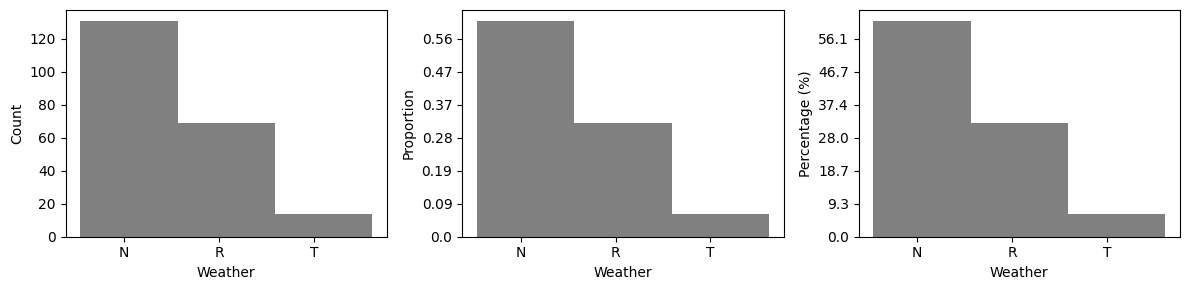

In [ ]:
# Create histogram for a categorical column using hist()
from matplotlib.ticker import PercentFormatter
fig, axs = plt.subplots(1,3, sharey=False, sharex=False, tight_layout=True, figsize=(12,3)) # define a figure with three subplots that are arranged as one row. yshare defines if the three plots share the y axis. xshare is similarly defined.

# frequency distribution
axs[0].hist(NY_bicycle.Weather, bins=3,color='grey')
axs[0].set_xlabel('Weather')
axs[0].set_ylabel('Count')
axs[0].set_xticks(np.arange(0.3,2,0.65))

# relative frequency distribution
axs[1].hist(NY_bicycle.Weather,bins=3, color='grey')
axs[1].set_xlabel('Weather')
axs[1].set_ylabel('Proportion')
axs[1].set_xticks(np.arange(0.3,2,0.65))
axs[1].set_yticklabels((np.arange(0,121,20)/len(NY_bicycle)).round(2)) # ytick labels are in relative frequency and rounded to two decimal places

# percent frequency distribution
axs[2].hist(NY_bicycle.Weather,bins=3, color='grey')
axs[2].set_xlabel('Weather')
axs[2].set_ylabel('Percentage (%)')
axs[2].set_xticks(np.arange(0.3,2,0.65))
axs[2].set_yticklabels((np.arange(0,121,20)/len(NY_bicycle)*100).round(1)) # ytick labels are in percent frequency and rounded to one decimal places

plt.show()

## Numerical Data

In [ ]:
NY_bicycle.Total.count() # count() returns the number of non-NA observatioins

214

In [ ]:
NY_bicycle.Total.max() # max() returns the maximum value of a numerical column

26969

In [ ]:
NY_bicycle.Total.min() # min() returns the minimum value of a numerical column

2374

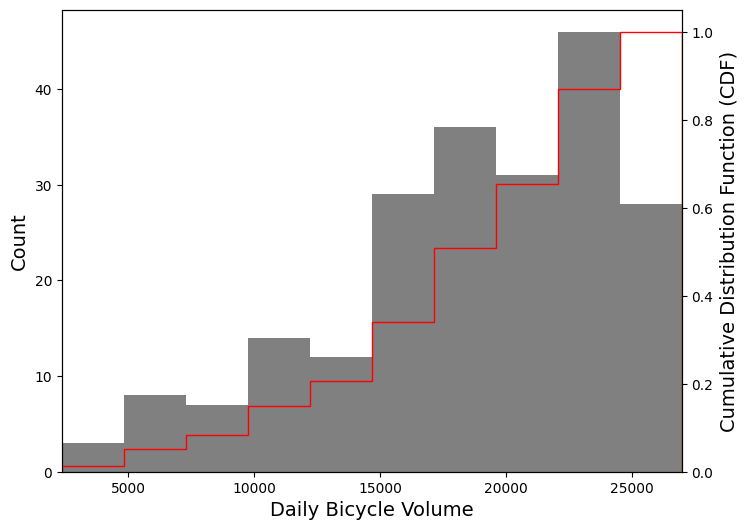

the number of bins: [<matplotlib.patches.Polygon object at 0x7e5ad88f23b0>]
edges of the bins: [ 2374.   4833.5  7293.   9752.5 12212.  14671.5 17131.  19590.5 22050.
 24509.5 26969. ]
counts within each bin: [ 3.  8.  7. 14. 12. 29. 36. 31. 46. 28.]


In [ ]:
#generates a histogram for a numerical column using plt.hist()

fig, ax = plt.subplots(figsize=(8,6)) # define a figure of one plot of size 8x6 inch
ax2 = ax.twinx() # create the second axis to show the cumulative distribution. ax.twinx() means to generate a twin x-axis
counts, bins, patches = ax.hist(NY_bicycle.Total, color='grey',density=False) # create the frequency distribution if density=False and probability density function if density=True
n, bins, patches = ax2.hist(
    NY_bicycle.Total, cumulative=True, density=True, histtype='step', color='red') # create the probability cumualtive distribution
ax.set_xlabel('Daily Bicycle Volume',fontsize=14)
ax.set_ylabel('Count',fontsize=14)
ax2.set_ylabel('Cumulative Distribution Function (CDF)',fontsize=14)
ax.set_xlim([NY_bicycle.Total.min(),NY_bicycle.Total.max()])
plt.show()

print('the number of bins:', patches)
print('edges of the bins:', bins)
print('counts within each bin:', counts)


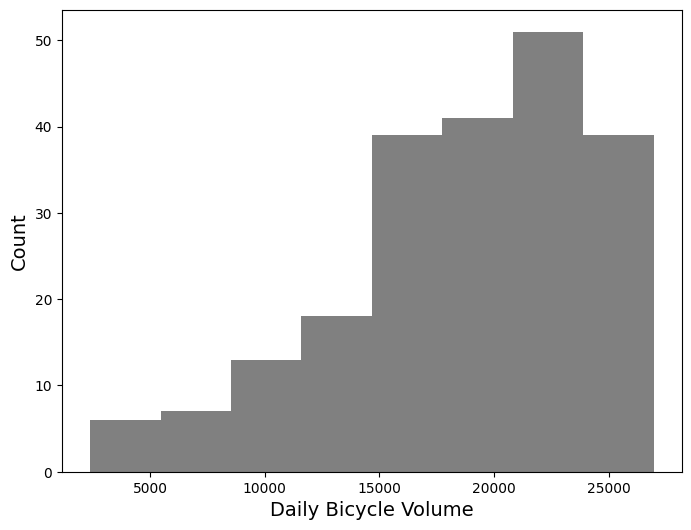

In [ ]:
#generate histogram using plt.hist() and self-defined bins. Here we define the number of bins is 8
plt.subplots(figsize=(8,6))
plt.hist(NY_bicycle.Total, bins=np.arange(NY_bicycle.Total.min(),
NY_bicycle.Total.max()+1, (NY_bicycle.Total.max()-NY_bicycle.Total.min())/8),color='grey',density=False,cumulative=False)
plt.xlabel('Daily Bicycle Volume',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show( )

# Numerical Data Description

### Measurements of Locations

In [ ]:
NY_bicycle.Total.mean().round(1) # mean() returns the mean value

18627.7

In [ ]:
NY_bicycle.Total.median().round(1) # median() returns the median value

19367.0

In [ ]:
NY_bicycle.Total.mode().round(1) # mode() returns the mode(s)

0    23159
Name: Total, dtype: int64

### Measurements of Variability

In [ ]:
NY_bicycle.Total.max() - NY_bicycle.Total.min() # find the range of a numerical column

24595

In [ ]:
NY_bicycle.Total.var().round(2) # var() returns the variance

30686697.18

In [ ]:
NY_bicycle.Total.std().round(2) # var() returns the sample standard deviation

5539.56

## Measurements of Distribution

In [ ]:
NY_bicycle.Total.quantile([0.25,0.5,0.75]) # quantile() returns value(s) at the given quantile(s)

0.25    15704.75
0.50    19367.00
0.75    23151.50
Name: Total, dtype: float64

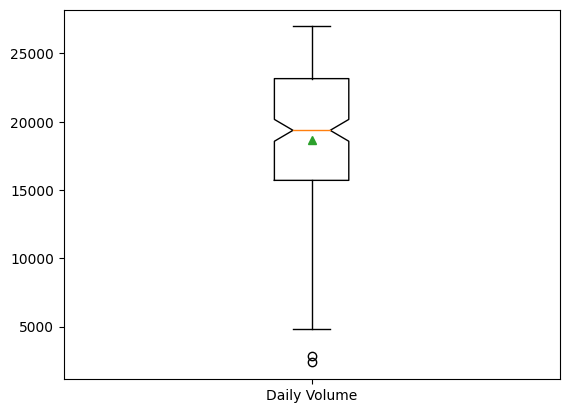

In [ ]:
# generate a boxplot using plt.boxplot() for a numerical variable
plt.boxplot(NY_bicycle.Total,notch=True,labels=['Daily Volume'],showfliers=True, showcaps=True,showmeans=True)
plt.show()

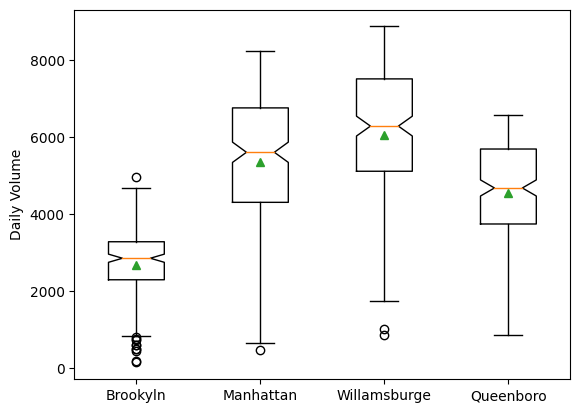

In [ ]:
# generate a boxplot for each of mulitple numerical variables
plt.boxplot([NY_bicycle.Brooklyn_Bridge,NY_bicycle.Manhattan_Bridge,NY_bicycle.Williamsburg_Bridge,NY_bicycle.Queensboro_Bridge],notch=True,
            labels=['Brookyln','Manhattan','Willamsburge','Queenboro'],showfliers=True, showcaps=True,showmeans=True)
plt.ylabel('Daily Volume')
plt.show()

## Measurements of Correlation

In [ ]:
NY_bicycle.corr().round(2) # corr() returns the correlation coefficient between any two numerical columns

<ipython-input-45-33d6b30119a9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  NY_bicycle.corr().round(2) # corr() returns the correlation coefficient between any two numerical columns


,High_Temp_F,Low_Temp_F,Precipitation,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
High_Temp_F,1.00,0.89,-0.19,0.49,0.46,0.48,0.50,0.49
Low_Temp_F,0.89,1.00,-0.05,0.29,0.29,0.31,0.35,0.32
Precipitation,-0.19,-0.05,1.00,-0.59,-0.55,-0.56,-0.54,-0.57
Brooklyn_Bridge,0.49,0.29,-0.59,1.00,0.89,0.89,0.88,0.92
Manhattan_Bridge,0.46,0.29,-0.55,0.89,1.00,0.98,0.96,0.99
Williamsburg_Bridge,0.48,0.31,-0.56,0.89,0.98,1.00,0.96,0.99
Queensboro_Bridge,0.50,0.35,-0.54,0.88,0.96,0.96,1.00,0.98
Total,0.49,0.32,-0.57,0.92,0.99,0.99,0.98,1.00


In [ ]:
NY_bicycle.Brooklyn_Bridge.corr(NY_bicycle.Manhattan_Bridge).round(2) # corr() returns the correlation coefficient between two columns

0.89

In [ ]:
NY_bicycle.cov().round(2) # cov() returns the covariance between any two numerical columns

<ipython-input-47-891781b5814c>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  NY_bicycle.cov().round(2) # cov() returns the covariance between any two numerical columns


,High_Temp_F,Low_Temp_F,Precipitation,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
High_Temp_F,107.96,85.95,-0.79,4387.50,8405.58,8745.01,6811.74,28349.83
Low_Temp_F,85.95,86.60,-0.19,2340.21,4673.00,5136.58,4272.02,16421.81
Precipitation,-0.79,-0.19,0.17,-208.98,-397.27,-406.49,-289.49,-1302.23
Brooklyn_Bridge,4387.50,2340.21,-208.98,730530.66,1333902.83,1330993.57,978789.45,4374216.51
Manhattan_Bridge,8405.58,4673.00,-397.27,1333902.83,3050424.76,3012097.02,2190936.63,9587361.23
Williamsburg_Bridge,8745.01,5136.58,-406.49,1330993.57,3012097.02,3082886.28,2210714.77,9636691.64
Queensboro_Bridge,6811.74,4272.02,-289.49,978789.45,2190936.63,2210714.77,1707986.95,7088427.79
Total,28349.83,16421.81,-1302.23,4374216.51,9587361.23,9636691.64,7088427.79,30686697.18


In [ ]:
NY_bicycle.Brooklyn_Bridge.cov(NY_bicycle.Manhattan_Bridge).round(2) # returns the covariance between two specific numerical columns

1333902.83

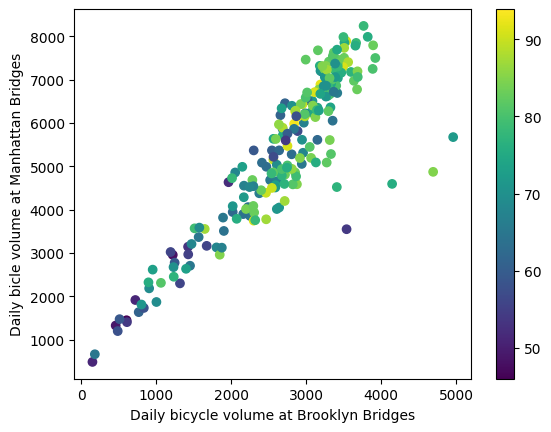

In [ ]:
# generate scatter plot using plt.scatter() to visualize the correlation between two numerical variables
plt.scatter(x=NY_bicycle.Brooklyn_Bridge,y=NY_bicycle.Manhattan_Bridge,c=NY_bicycle.High_Temp_F,cmap='viridis') # plt.scatter() returns a scatter plot of two numerical columns to show there association. The color is the 'High_Temp_F' value of each data point
plt.xlabel('Daily bicycle volume at Brooklyn Bridges') #plt.xlabel() defines the x label of the plot
plt.ylabel('Daily bicle volume at Manhattan Bridges') #plt.ylabel() defines the y label of the plot
#plt.title('') #plt.title() defines the title of the plot
plt.colorbar() # displays the colorbar
plt.show()

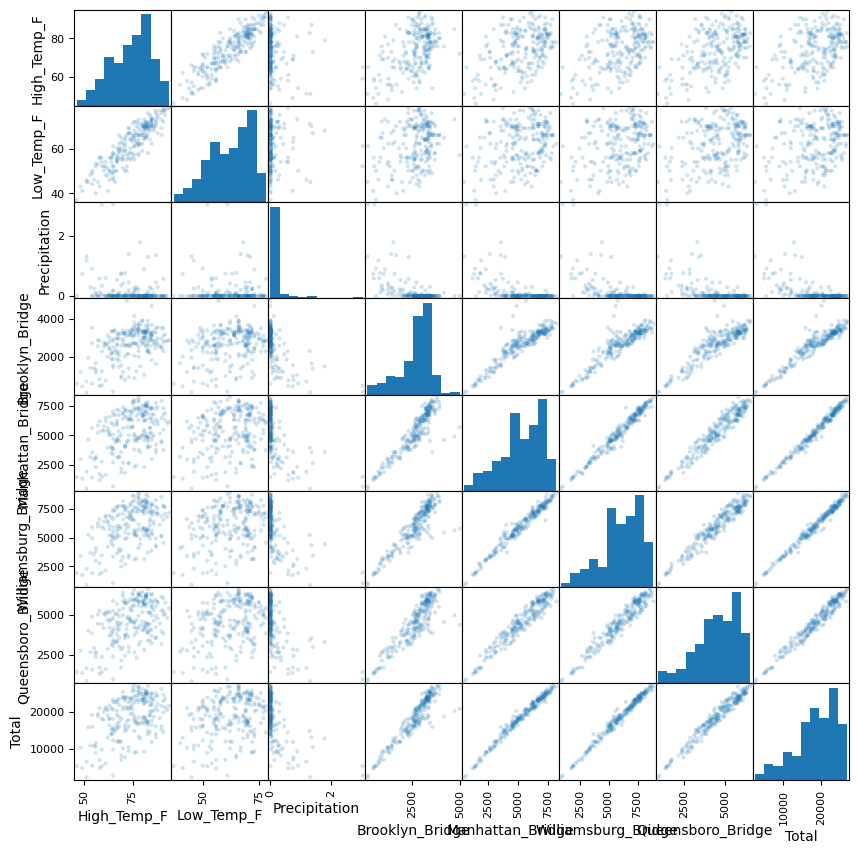

In [ ]:
# generate satter plot matrix using pd.plotting.scatter_matrix()

y=pd.plotting.scatter_matrix(NY_bicycle,alpha=0.2,figsize=(10,10)) #pd.plotting.scatter_matrix() generates the matrix of scatter plots
plt.show()

# Grouping & Aggregrating Data

In [ ]:
df_gd=NY_bicycle.groupby('Weather') # groupby() groups the dataframe by the categorical variable 'Weather'
df_gd.size() # df.size() returns the number of observations of each columns by categories of Weather

Weather
N    131
R     69
T     14
dtype: int64

In [ ]:
# after grouped the data, key is an identify of each group, and y is the data of each group
for key,y in NY_bicycle.groupby('Weather'):
  print ("the group for Weather '{}' has {} observations".format(key,len(y)))

the group for Weather 'N' has 131 observations
the group for Weather 'R' has 69 observations
the group for Weather 'T' has 14 observations


In [ ]:
df_gd = NY_bicycle.groupby(['Weather','Day']) # group the dataframe by the combination of two categorical variables: 'Weather' and 'Day'
df_gd.size() # count the number of observations by groups

#for key, y in NY_bicycle.groupby(['Weather','Day']):
#  print("the gorup for weather '{}' on {} has {} observations".format(key[0],key[1],len(y)))

Weather  Day      
N        Friday       18
         Monday       18
         Saturday     17
         Sunday       21
         Thursday     21
         Tuesday      18
         Wednesday    18
R        Friday        9
         Monday       11
         Saturday     14
         Sunday        7
         Thursday      7
         Tuesday      11
         Wednesday    10
T        Friday        3
         Monday        2
         Sunday        3
         Thursday      2
         Tuesday       2
         Wednesday     2
dtype: int64

In [ ]:
NY_bicycle.groupby(['Weather','Day']).size().to_frame('Counts of observations') # to_frame() converts series to DataFrame

Counts of observations
Weather Day                              
N       Friday                         18
        Monday                         18
        Saturday                       17
        Sunday                         21
        Thursday                       21
        Tuesday                        18
        Wednesday                      18
R       Friday                          9
        Monday                         11
        Saturday                       14
        Sunday                          7
        Thursday                        7
        Tuesday                        11
        Wednesday                      10
T       Friday                          3
        Monday                          2
        Sunday                          3
        Thursday                        2
        Tuesday                         2
        Wednesday                       2

In [ ]:
# apply() applies a function along an axis of the DataFrame
# "lambda arguments: function" defines a function
# join() joins all items in a list into a string, using a symbol (like a comma) as separator
NY_bicycle.groupby('Day').Weather.apply(lambda Weather: ','.join(Weather))

Day
Friday       T,N,R,N,R,N,N,R,R,N,N,R,T,R,R,N,N,R,T,R,N,N,N,...
Monday       R,N,T,T,N,N,N,R,R,R,N,R,N,R,N,N,R,N,R,N,N,N,N,...
Saturday     N,N,N,R,R,R,R,R,N,R,N,R,R,R,N,N,R,N,R,R,N,N,R,...
Sunday       N,N,T,N,N,R,R,N,N,R,N,T,N,N,N,N,R,N,N,N,N,N,R,...
Thursday     R,N,R,N,N,N,N,R,N,N,N,N,N,T,N,R,T,N,N,N,N,N,R,...
Tuesday      R,N,N,R,N,N,N,N,R,R,T,R,R,N,N,N,N,N,N,R,R,R,T,...
Wednesday    N,R,T,R,N,N,N,R,R,N,R,N,N,N,N,N,N,R,N,N,T,R,R,...
Name: Weather, dtype: object

In [ ]:
# tolist() converts series into a list
NY_bicycle.groupby('Weather').Day.apply(lambda Days: Days.tolist())

Weather
N    [Saturday, Sunday, Wednesday, Saturday, Sunday...
R    [Monday, Tuesday, Thursday, Wednesday, Thursda...
T    [Friday, Sunday, Monday, Wednesday, Monday, Tu...
Name: Day, dtype: object

In [ ]:
NY_bicycle.groupby('Day').Weather.nunique().to_frame('Count Weather Types') # use unique() to find the number of unique values by groups

,Count Weather Types
Day,
Friday,3
Monday,3
Saturday,2
Sunday,3
Thursday,3
Tuesday,3
Wednesday,3


In [ ]:
NY_bicycle.groupby('Weather').Total.sum().to_frame() #use sum() to find the sum of 'Total' values by groups

,Total
Weather,
N,2741334
R,977751
T,267238


In [ ]:
# group data by categories of weather, convert the result as a dataframe, reset the index of the dataframe, and sort the dataframe by the 'Total' values in the ascending order
NY_bicycle.groupby('Weather').Total.sum().reset_index().sort_values(by='Total', ascending=True)

,Weather,Total
2,T,267238
1,R,977751
0,N,2741334


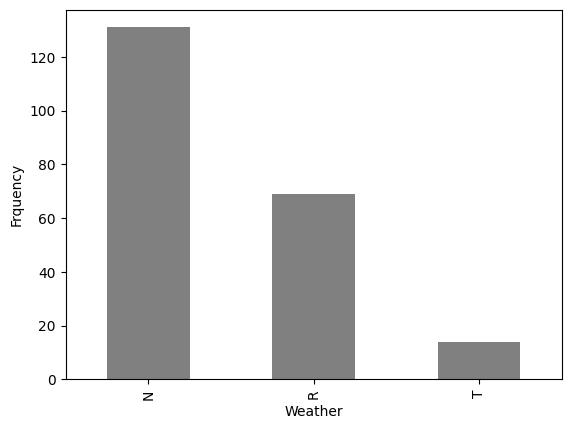

In [ ]:
# a bar chart displaying the distribution of a categorical variable
plt.clf() # clear the current figure
NY_bicycle.groupby('Weather').size().plot(kind='bar', color='grey') #size() returns the size of each group
plt.ylabel('Frquency')
plt.show()

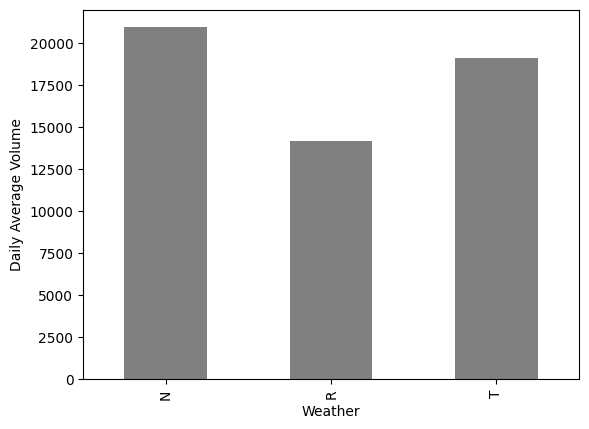

In [ ]:
# a bar chart displaying the sample mean value of 'Total' by Weather groups
plt.clf()
NY_bicycle.groupby('Weather').Total.mean().plot(kind='bar', color='grey')
plt.ylabel('Daily Average Volume')
plt.show()

             mean      std
Weather                   
N        20926.21  3876.82
R        14170.30  5816.20
T        19088.43  4077.09


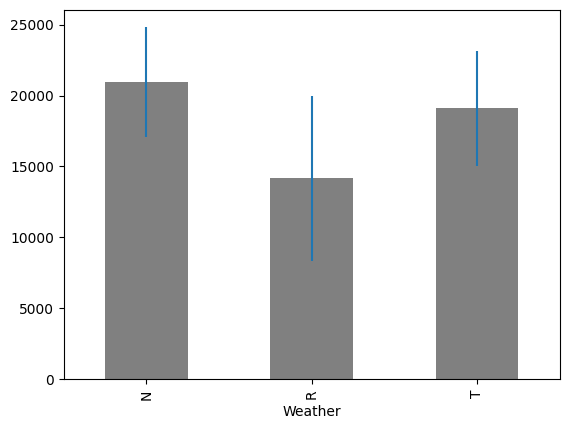

In [ ]:
# a bar chart displaying the sample mean and sample standard deviation of 'Total' by weather groups

# create a bar chart of mean values of 'Total' by weather categories
plt.clf
ax = plt.gca() # Get the current ~matplotlib.axes.Axes instance on the current figure matching the given keyword args, or create one.
NY_bicycle.groupby('Weather').Total.mean().plot(kind='bar', color='grey', ax=ax)

# calculate the mean and the standard deviation of each group
df_gd=NY_bicycle.groupby('Weather').Total.agg([np.mean,np.std]).round(2) # agg() ggregates using one or more operations over the specified axis
print(df_gd)

# add verticle lines to represent the variation of 'Total' of each group
for i, (index, row) in enumerate(df_gd.iterrows()): # iterrows() iterates over DataFrame rows as (row index, data series) pairs.
  #name = row.name
  mean = row ['mean']
  stdev = row ['std']
  ax.vlines(x=i, ymin=mean-stdev, ymax=mean+stdev) # ax.vlines(x, ymin, ymax) plots a verticle line at the location specified by x. The range of the line is from ymin to ymax
plt.show()

In [ ]:
NY_bicycle.groupby('Weather').agg({'Total':np.mean,'Precipitation':np.std}).round(2) # group data by weather categories and aggregrate data in each group in terms of the mean value of 'Total' and the standard deviation of precipitation

,Total,Precipitation
Weather,,
N,20926.21,0.00
R,14170.30,0.61
T,19088.43,NaN


In [ ]:
df_gd=NY_bicycle.groupby(['Weather','Day']).agg({'Total':[np.mean,np.std,np.max,np.min,np.median]}).round(2) # group data by the combination of weather and day categories, and calculate a set of statistics of "Total"
print(df_gd)

                      Total                                
                       mean      std   amax   amin   median
Weather Day                                                
N       Friday     21373.11  1924.22  23944  17168  21969.0
        Monday     22359.56  2321.45  25680  16860  23045.0
        Saturday   16141.59  3498.48  20134   5397  17259.0
        Sunday     16598.71  1819.46  20787  13033  16765.0
        Thursday   23145.38  2409.25  26360  18290  23923.0
        Tuesday    23115.56  3094.60  26622  13925  23986.5
        Wednesday  23835.17  2343.27  26969  17991  23223.5
R       Friday     13289.67  5552.36  23539   5356  12805.0
        Monday     12118.18  4460.55  19939   6126  11862.0
        Saturday   13719.57  4415.86  19043   2374  14781.0
        Sunday     10012.57  4281.90  15878   2835   9865.0
        Thursday   15358.57  8130.33  23948   4789  18140.0
        Tuesday    15116.64  6678.15  24946   5493  16638.0
        Wednesday  18888.90  5045.21  24

In [ ]:
df_gd=NY_bicycle.groupby(['Weather','Day']).agg({'Total':[np.mean,np.std,np.max,np.min,np.median]}).round(2)
print(df_gd.columns.values)
df_gd.columns = [' '.join(col) for col in df_gd.columns.values] #re-define column lables
print(df_gd.columns.values)

[('Total', 'mean') ('Total', 'std') ('Total', 'amax') ('Total', 'amin')
 ('Total', 'median')]
['Total mean' 'Total std' 'Total amax' 'Total amin' 'Total median']


In [ ]:
df_gd=NY_bicycle.groupby(['Weather','Day']).agg({'Total':[np.mean,np.std,np.max,np.min,np.median]}).round(2) # group data by the combination of weather and day categories, and calculate a set of statistics of "Total"
print(df_gd)

                      Total                                
                       mean      std   amax   amin   median
Weather Day                                                
N       Friday     21373.11  1924.22  23944  17168  21969.0
        Monday     22359.56  2321.45  25680  16860  23045.0
        Saturday   16141.59  3498.48  20134   5397  17259.0
        Sunday     16598.71  1819.46  20787  13033  16765.0
        Thursday   23145.38  2409.25  26360  18290  23923.0
        Tuesday    23115.56  3094.60  26622  13925  23986.5
        Wednesday  23835.17  2343.27  26969  17991  23223.5
R       Friday     13289.67  5552.36  23539   5356  12805.0
        Monday     12118.18  4460.55  19939   6126  11862.0
        Saturday   13719.57  4415.86  19043   2374  14781.0
        Sunday     10012.57  4281.90  15878   2835   9865.0
        Thursday   15358.57  8130.33  23948   4789  18140.0
        Tuesday    15116.64  6678.15  24946   5493  16638.0
        Wednesday  18888.90  5045.21  24

In [ ]:
df_gd=NY_bicycle.groupby(['Weather','Day']).agg({'Total':[np.mean,np.std,np.max,np.min,np.median]}).round(2)
df_gd.reset_index() #add index and turn it into a dataframe

Weather        Day     Total                                
                           mean      std   amax   amin   median
0        N     Friday  21373.11  1924.22  23944  17168  21969.0
1        N     Monday  22359.56  2321.45  25680  16860  23045.0
2        N   Saturday  16141.59  3498.48  20134   5397  17259.0
3        N     Sunday  16598.71  1819.46  20787  13033  16765.0
4        N   Thursday  23145.38  2409.25  26360  18290  23923.0
5        N    Tuesday  23115.56  3094.60  26622  13925  23986.5
6        N  Wednesday  23835.17  2343.27  26969  17991  23223.5
7        R     Friday  13289.67  5552.36  23539   5356  12805.0
8        R     Monday  12118.18  4460.55  19939   6126  11862.0
9        R   Saturday  13719.57  4415.86  19043   2374  14781.0
10       R     Sunday  10012.57  4281.90  15878   2835   9865.0
11       R   Thursday  15358.57  8130.33  23948   4789  18140.0
12       R    Tuesday  15116.64  6678.15  24946   5493  16638.0
13       R  Wednesday  18888.90  5045.21  24763   9819  20093.5
14       T     Friday  17621.67  6371.72  22180  10341  20344.0
15       T     Monday  19470.50  2284.66  21086  17855  19470.5
16       T     Sunday  15369.33   961.62  16408  14510  15190.0
17       T   Thursday  22495.00   896.61  23129  21861  22495.0
18       T    Tuesday  22754.00  1664.53  23931  21577  22754.0
19       T  Wednesday  19413.00  5071.37  22999  15827  19413.0

In [ ]:
NY_bicycle.groupby(['Weather','Day']).Total.mean().reset_index(name='Average Daily Volume').round(2) #add index and convert to dataframe. Name the mean value of total as Average Daily Volume



,Weather,Day,Average Daily Volume
0,N,Friday,21373.11
1,N,Monday,22359.56
2,N,Saturday,16141.59
3,N,Sunday,16598.71
4,N,Thursday,23145.38
5,N,Tuesday,23115.56
6,N,Wednesday,23835.17
7,R,Friday,13289.67
8,R,Monday,12118.18
9,R,Saturday,13719.57


In [ ]:
df_gd = NY_bicycle.groupby('Weather')
df_gd.get_group('T') # get_group() constructs DataFrame from group with provided name. In this example, a dataframe is consructed using group "T"

,Date,Day,High_Temp_F,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
6,7-Apr,Friday,48.0,43.0,NaN,T,1222,2955,3399,2765,10341
15,16-Apr,Sunday,84.9,62.1,NaN,T,2877,4585,5259,3687,16408
16,17-Apr,Monday,73.9,64.0,NaN,T,3152,6352,6924,4658,21086
18,19-Apr,Wednesday,52.0,45.0,NaN,T,1965,4632,5234,3996,15827
23,24-Apr,Monday,60.1,50.0,NaN,T,2544,5366,5762,4183,17855
73,13-Jun,Tuesday,93.9,78.1,NaN,T,2882,6141,7155,5399,21577
78,18-Jun,Sunday,84.0,72.0,NaN,T,2199,4014,4901,3396,14510
90,30-Jun,Friday,88.0,73.9,NaN,T,2687,5890,7013,4754,20344
96,6-Jul,Thursday,75.0,71.1,NaN,T,3065,6243,7302,5251,21861
117,27-Jul,Thursday,77.0,66.9,NaN,T,3287,6624,7221,5997,23129


In [ ]:
# generate a random sample from each of the grouped data
df_sample=NY_bicycle.groupby('Weather').apply(lambda group_df: group_df.sample(3)).reset_index(drop=True) # sample() returns a random sample. reset_index(drop=True) means do not add the index as a column of the dataframe
print(df_sample)

     Date        Day  High_Temp_F  Low_Temp_F  Precipitation Weather  \
0   5-Jul  Wednesday         84.9        71.1           0.00       N   
1  15-Sep     Friday         81.0        66.9           0.00       N   
2  10-Jul     Monday         82.9        71.1           0.00       N   
3  26-May     Friday         73.0        55.9           0.10       R   
4  24-May  Wednesday         66.9        57.0           0.04       R   
5  30-Aug  Wednesday         75.9        61.0           0.01       R   
6  15-Oct     Sunday         72.0        66.0            NaN       T   
7  18-Jun     Sunday         84.0        72.0            NaN       T   
8  17-Apr     Monday         73.9        64.0            NaN       T   

   Brooklyn_Bridge  Manhattan_Bridge  Williamsburg_Bridge  Queensboro_Bridge  \
0             3170              6770                 7308               5862   
1             3344              6998                 7749               5853   
2             3506              7503   

#Cross-tabulation

# Joint Probability Table

In [ ]:
# create the joint probability table using crosstab(normalize=True). If normalize=False, the table counts observations in each cross-cell
#pt=pd.crosstab(df.Weather,df.Temperature, values=df.Volume,aggfunc='count', margins=True, normalize=False) # use crosstab() to create a cross-tablulation whose rows are weather types and columns are temperature
#pt.round(2)
pt = pd.crosstab(df.Weather,df.Temperature,values=df.index, aggfunc='count',margins=True, normalize=True)
pt.round(2)

Temperature,"(45, 55]","(55, 65]","(65, 75]","(75, 85]","(85, 95]",All
Weather,,,,,,
N,0.01,0.09,0.15,0.28,0.08,0.61
R,0.03,0.07,0.10,0.09,0.03,0.32
T,0.01,0.00,0.01,0.03,0.01,0.07
All,0.05,0.17,0.27,0.39,0.12,1.00


In [ ]:
# create a cross-tabulation to summary data on two-axes using pd.crosstab(index,colum,values,aggfunc). index and column are the two axes, values are array-like, aggregrated using the specific aggfunc
pd.crosstab(NY_bicycle.Weather,NY_bicycle.Day,margins=True,values=NY_bicycle.Total, aggfunc='mean').round(1) #margins=True will provide the margins of the crosstabulation


Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,All
Weather,,,,,,,,
N,21373.1,22359.6,16141.6,16598.7,23145.4,23115.6,23835.2,20926.2
R,13289.7,12118.2,13719.6,10012.6,15358.6,15116.6,18888.9,14170.3
T,17621.7,19470.5,NaN,15369.3,22495.0,22754.0,19413.0,19088.4
All,18572.9,18539.1,15047.8,14992.5,21285.1,20253.9,21891.6,18627.7


In [ ]:
# using pivot_table() is another way to generate cross tabulation
pd.pivot_table(NY_bicycle, index=['Weather'],columns=['Day'],values=['Total'],aggfunc='mean').round(1)

Total                                                       
Day       Friday   Monday Saturday   Sunday Thursday  Tuesday Wednesday
Weather                                                                
N        21373.1  22359.6  16141.6  16598.7  23145.4  23115.6   23835.2
R        13289.7  12118.2  13719.6  10012.6  15358.6  15116.6   18888.9
T        17621.7  19470.5      NaN  15369.3  22495.0  22754.0   19413.0

In [ ]:
# create crosstabulation using pd.pivot_table(data,index,columns,values, and aggfunc)
pd.pivot_table(NY_bicycle,index=['Weather'],columns=['Day'],values=['Brooklyn_Bridge','Total'], aggfunc={'Brooklyn_Bridge':'count','Total':'mean'},margins=True).round(1)

Brooklyn_Bridge                                                    \
Day              Friday Monday Saturday Sunday Thursday Tuesday Wednesday   
Weather                                                                     
N                  18.0   18.0     17.0   21.0     21.0    18.0      18.0   
R                   9.0   11.0     14.0    7.0      7.0    11.0      10.0   
T                   3.0    2.0      NaN    3.0      2.0     2.0       2.0   
All                30.0   31.0     31.0   31.0     30.0    31.0      30.0   

                Total                                                         \
Day      All   Friday   Monday Saturday   Sunday Thursday  Tuesday Wednesday   
Weather                                                                        
N        131  21373.1  22359.6  16141.6  16598.7  23145.4  23115.6   23835.2   
R         69  13289.7  12118.2  13719.6  10012.6  15358.6  15116.6   18888.9   
T         14  17621.7  19470.5      NaN  15369.3  22495.0  22754.0   19413.0   
All      214  18572.9  18539.1  15047.8  14992.5  21285.1  20253.9   21891.6   

                  
Day          All  
Weather           
N        20926.2  
R        14170.3  
T        19088.4  
All      18627.7

In [ ]:
df_gd = pd.pivot_table(NY_bicycle,index=['Weather'],columns=['Day'],values=['High_Temp_F','Low_Temp_F'],aggfunc=['mean'], margins=True).round(1)
df_gd.query("Weather==['N','R']") # query() retrieves a portion of dataframe with defined criterion


mean                                                          \
        High_Temp_F                                                           
Day          Friday Monday Saturday Sunday Thursday Tuesday Wednesday   All   
Weather                                                                       
N              75.2   77.6     73.7   76.3     76.2    74.6      77.5  75.9   
R              72.7   68.6     72.5   68.0     68.5    68.9      74.8  70.8   

                                                                            
        Low_Temp_F                                                          
Day         Friday Monday Saturday Sunday Thursday Tuesday Wednesday   All  
Weather                                                                     
N             61.2   63.4     60.4   61.5     63.7    61.4      63.5  62.2  
R             63.1   59.9     62.0   60.2     58.6    61.8      61.8  61.2

In [ ]:
df_gd = pd.pivot_table(NY_bicycle,index=['Weather','Day'],values=['High_Temp_F','Low_Temp_F'],aggfunc=['mean'], margins=True).round(1)
df_gd.query("Weather==['N','R']") # using query() function to extract part of the summary table

mean           
                  High_Temp_F Low_Temp_F
Weather Day                             
N       Friday           75.2       61.2
        Monday           77.6       63.4
        Saturday         73.7       60.4
        Sunday           76.3       61.5
        Thursday         76.2       63.7
        Tuesday          74.6       61.4
        Wednesday        77.5       63.5
R       Friday           72.7       63.1
        Monday           68.6       59.9
        Saturday         72.5       62.0
        Sunday           68.0       60.2
        Thursday         68.5       58.6
        Tuesday          68.9       61.8
        Wednesday        74.8       61.8

In [ ]:
df_gd = pd.pivot_table(NY_bicycle,index=['Weather','Day'],values=['High_Temp_F','Low_Temp_F'],aggfunc=['mean'], margins=True).round(1)
df_gd.query("Weather==['N','R'] & Day =='Friday'")

mean           
               High_Temp_F Low_Temp_F
Weather Day                          
N       Friday        75.2       61.2
R       Friday        72.7       63.1

# Conditional Probability Tables

In [ ]:
# create a conditional probability using crosstab(normalize='columns')
#Given a temperature range, what is the probability distribution weather? P(i,j)/sum_i P(i,j)
pt=pd.crosstab(df.Weather,df.Temperature, values=df.index,aggfunc='count',normalize='columns', margins=True) # use crosstab() to create a cross-tablulation whose rows are days of the week and columns are locations
mg = pd.DataFrame(np.array([[1] * 6]), columns=pt.columns.to_list(), index=['All'])# create a row and make it the margin to be located at bottom of the table. This new column has six columns, column labels are the same as those of df, and the index of this row is "All".
pt = pd.concat([pt, mg]) # use pd.concat() to add the margin to the cross tabulation
pt.round(2)

,"(45, 55]","(55, 65]","(65, 75]","(75, 85]","(85, 95]",All
N,0.18,0.54,0.58,0.70,0.68,0.61
R,0.64,0.43,0.37,0.23,0.24,0.32
T,0.18,0.03,0.05,0.07,0.08,0.07
All,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
# create a conditional probability using crosstab(normalize='index')
# Given a weather condition, what is the distribution of temperature? P(i,j)/sum_j P(i,j)
pt=pd.crosstab(df.Weather,df.Temperature, values=df.index,aggfunc='count',normalize='index', margins=True)
pt['All']=1.00 # add a column named "All" and add it as the margin to to belocated at the right of the table
pt.round(2)

Temperature,"(45, 55]","(55, 65]","(65, 75]","(75, 85]","(85, 95]",All
Weather,,,,,,
N,0.02,0.15,0.25,0.45,0.13,1.0
R,0.10,0.23,0.30,0.28,0.09,1.0
T,0.14,0.07,0.21,0.43,0.14,1.0
All,0.05,0.17,0.27,0.39,0.12,1.0
